<a href="https://colab.research.google.com/github/akhamuro/NYU-Bootcamp-Midterm/blob/main/Finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#downloading the Propser Loan Data
import pandas as pd

prosper_url = "https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv"

prosper = pd.read_csv(prosper_url, low_memory=False)
prosper.head()


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [ ]:
#HMDA Data
hmda_url = "https://ffiec.cfpb.gov/v2/data-browser-api/view/csv?years=2022&states=NY"

hmda = pd.read_csv(hmda_url, low_memory=False)
hmda.head()

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2022,549300FGXN1K3HLB1R50,10580,NY,36093.0,3.609303e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,2615,13.92,106000,85.29,796,1120,0
1,2022,549300FGXN1K3HLB1R50,99999,NY,36089.0,3.608949e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,4595,24.70,76700,124.21,1074,1402,72
2,2022,549300FGXN1K3HLB1R50,15380,NY,36029.0,3.602901e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,4488,12.72,87700,123.40,1581,1744,61
3,2022,549300FGXN1K3HLB1R50,35614,NY,36081.0,3.608110e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,6642,29.92,99000,118.50,2430,1417,63
4,2022,549300FGXN1K3HLB1R50,45060,NY,36075.0,3.607502e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,2794,8.73,91100,77.84,934,1048,46


In [ ]:
#we select relevant columns for our project
prosper_cols = [
    "BorrowerAPR",
    "BorrowerRate",
    "LoanOriginalAmount",
    "ListingCategory (numeric)",
    "IncomeRange",
    "EmploymentStatus",
    "DebtToIncomeRatio",
    "CreditScoreRangeLower",
    "CreditScoreRangeUpper",
    "ProsperRating (Alpha)",
    "ProsperScore"
]
#ignore other irrelevant columns
prosper_cols = [c for c in prosper_cols if c in prosper.columns]
prosper_fe = prosper[prosper_cols].copy()

#create a numeric credit score midpoint
prosper_fe["CreditScoreRangeLower"] = pd.to_numeric(
    prosper_fe["CreditScoreRangeLower"], errors="coerce"
)
prosper_fe["CreditScoreRangeUpper"] = pd.to_numeric(
    prosper_fe["CreditScoreRangeUpper"], errors="coerce"
)
prosper_fe["CreditScoreMid"] = (
    prosper_fe["CreditScoreRangeLower"] + prosper_fe["CreditScoreRangeUpper"]
) / 2

#we then drop rows where info is missing
key_cols = [
    "BorrowerAPR",
    "LoanOriginalAmount",
    "DebtToIncomeRatio",
    "CreditScoreMid",
]
key_cols = [c for c in key_cols if c in prosper_fe.columns]

prosper_fe = prosper_fe.dropna(subset=key_cols)

In [ ]:
#we want to convert categoricals to the dtype category
for col in ["IncomeRange", "EmploymentStatus", "ProsperRating (Alpha)"]:
    if col in prosper_fe.columns:
        prosper_fe[col] = prosper_fe[col].astype("category")


To answer our first question, we predict  BorrowerAPR using loan purpose and other features

In [ ]:
#we use our the clean data prosper_fe and use the one-hot encoder for loan purpose
df_1 = prosper_fe[[
    "BorrowerAPR",
    "LoanOriginalAmount",
    "DebtToIncomeRatio",
    "CreditScoreMid",
    "ListingCategory (numeric)",
    "IncomeRange",
    "EmploymentStatus",
    "ProsperRating (Alpha)"
]].dropna()

df_1 = pd.get_dummies(
    df_1,
    columns=["ListingCategory (numeric)", "IncomeRange", "EmploymentStatus", "ProsperRating (Alpha)"],
    drop_first=True
)

#we then define X and y, respectively features and target.
X_1 = df_1.drop("BorrowerAPR", axis=1)
y_1 = df_1["BorrowerAPR"]


In [ ]:
#Train test and split
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X_1, y_1, test_size=0.2, random_state=42
)

In [ ]:
#fit the linear regression
from sklearn.linear_model import LinearRegression
lr_1 = LinearRegression()
lr_1.fit(X1_train, y1_train)

LinearRegression()

In [ ]:
#Predict on testing dataset
y1_pred = lr_1.predict(X1_test)

In [ ]:
#evaluate with root mean squared error
from sklearn.metrics import mean_squared_error
rmse_1 = mean_squared_error(y1_test, y1_pred)
print(rmse_1)

0.0004286465486117002


In [ ]:
#top and bottom coefficients
coef_1 = pd.Series(lr_1.coef_, index=X_1.columns)
print(coef_1.sort_values(ascending=False).head(10))
print(coef_1.sort_values().head(10))

ProsperRating (Alpha)_HR        0.215963
ProsperRating (Alpha)_E         0.190197
ProsperRating (Alpha)_D         0.140469
ProsperRating (Alpha)_C         0.087289
ProsperRating (Alpha)_B         0.045254
ListingCategory (numeric)_17    0.013884
ListingCategory (numeric)_10    0.013728
ListingCategory (numeric)_3     0.011750
ListingCategory (numeric)_16    0.011592
ListingCategory (numeric)_9     0.010294
dtype: float64
ProsperRating (Alpha)_AA         -0.049625
EmploymentStatus_Self-employed   -0.012440
EmploymentStatus_Part-time       -0.004379
IncomeRange_$50,000-74,999       -0.002546
IncomeRange_$75,000-99,999       -0.002449
IncomeRange_$100,000+            -0.002218
EmploymentStatus_Other           -0.002055
IncomeRange_$25,000-49,999       -0.001668
EmploymentStatus_Full-time       -0.001401
EmploymentStatus_Retired         -0.001400
dtype: float64


We see that loan purposes (ListingCategory (numeric)) affects annual percentage rating(APR), or annual cost of a loan, but borrower credit quality (ProsperRating) is actually more important.

Overall, borrowers with low credit scores (HR, E D) had APRs of 0.22, 0.19, 0.14, which is higher than the baseline category.

Borrowers with high grade credit scores(AA) showed APR lower than the baseline.

Loan purpose has some meaningful variation such as numeric_17 (green loans) and numeric_10(baby adoption)

Conclusion is credit grade matters more.

In [ ]:
#cleaned prosper data, now we select relevant columns
df_2 = prosper_fe[[
    "LoanOriginalAmount",
    "BorrowerAPR",
    "DebtToIncomeRatio",
    "CreditScoreMid",
    "IncomeRange",
    "EmploymentStatus",
    "ProsperRating (Alpha)",
    "ListingCategory (numeric)"
]].dropna()

#we one hot encode all categorical variables
df_2 = pd.get_dummies(
    df_2,
    columns=["IncomeRange", "EmploymentStatus", "ProsperRating (Alpha)", "ListingCategory (numeric)"],
    drop_first=True
)



In [ ]:
#we define the X and y, features and target respectively
X_2 = df_2.drop("LoanOriginalAmount", axis=1)
y_2 = df_2["LoanOriginalAmount"]

#split data into train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X_2, y_2, test_size=0.2, random_state=42
)

In [ ]:
#scale features
from sklearn.preprocessing import StandardScaler
scaler_2 = StandardScaler()
X2_trainscaled = scaler_2.fit_transform(X2_train)
X2_testscaled = scaler_2.transform(X2_test)

In [ ]:
#define ANN model of multi-layer perceptron regressor
from sklearn.neural_network import MLPRegressor
ann_2 = MLPRegressor(
    hidden_layer_sizes = (64, 32),
    activation = "relu",
    solver = "adam",
    max_iter = 300,
    random_state = 42,
    early_stopping = True
)

In [ ]:
#train the network
ann_2.fit(X2_trainscaled, y2_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(early_stopping=True, hidden_layer_sizes=(64, 32), max_iter=300,
             random_state=42)

In [ ]:
#predict on the test set
y2_pred = ann_2.predict(X2_testscaled)

In [ ]:
#evaluate RSME and R2
from sklearn.metrics import mean_squared_error, r2_score
rmse_2 = mean_squared_error(y2_test,y2_pred)
r2_2 = r2_score(y2_test, y2_pred)

print(rmse_2)

19497053.526015654


In [ ]:
print(r2_2)

0.5294728761666672


For our result of root mean squared error, 19497053.526015654, this is not the strongest measure of original loan amount. This is because we know the original loan amount in the Prosper dataset ranges from $2,000 to $35,000, but some values are significantly higher.

RMSE is in absolute dollar format, so the neural network isn't minimizing squared error very well due to large outliers.

For our result of R2, our model captures around 53% of the variance patterns that determine loan amount.

Thus R2 is a more meaningful performance metric.

In [ ]:
#clean data from propser
df_3 = prosper_fe[[
    "BorrowerAPR",
    "CreditScoreMid",
    "DebtToIncomeRatio",
    "LoanOriginalAmount",
    "ProsperRating (Alpha)",
    "ListingCategory (numeric)",
    "IncomeRange",
    "EmploymentStatus"
]].dropna()


In [ ]:
#one hot encode to change categorical variables to numerical values
df_3 = pd.get_dummies(
    df_3,
    columns=['ProsperRating (Alpha)', 'ListingCategory (numeric)', 'IncomeRange', 'EmploymentStatus'],
    drop_first=True
)

#we define X and y
X_3 = df_3.drop("BorrowerAPR", axis=1)
y_3 = df_3["BorrowerAPR"]


In [ ]:
#train test and split
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X_3, y_3, test_size=0.2, random_state=42
)

In [ ]:
#initialize and train the gradient boosting model
from sklearn.ensemble import GradientBoostingRegressor
gbr_3 = GradientBoostingRegressor(
    n_estimators = 300,
    learning_rate = 0.05,
    max_depth = 3,
    random_state = 42
)
gbr_3.fit(X3_train, y3_train)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=300, random_state=42)

In [ ]:
#predict on the test set
y3_pred = gbr_3.predict(X3_test)

In [ ]:
#we evaluate the model through root mean squared error and r2
rmse3 = mean_squared_error(y3_test, y3_pred)
r2_3 = r2_score(y3_test, y3_pred)
print(rmse3)

0.00041130140822878675


In [ ]:
print(r2_3)

0.9344152285734793


In [ ]:
#then we examine how important features are
importance = pd.Series(gbr_3.feature_importances_, index=X_3.columns)
print(importance.sort_values(ascending=False).head(15))

ProsperRating (Alpha)_E        0.236522
ProsperRating (Alpha)_HR       0.225527
ProsperRating (Alpha)_D        0.188791
ProsperRating (Alpha)_AA       0.126059
CreditScoreMid                 0.108399
ProsperRating (Alpha)_C        0.067648
ProsperRating (Alpha)_B        0.031723
LoanOriginalAmount             0.012573
DebtToIncomeRatio              0.000953
ListingCategory (numeric)_1    0.000815
EmploymentStatus_Full-time     0.000610
ListingCategory (numeric)_7    0.000154
ListingCategory (numeric)_3    0.000065
IncomeRange_$25,000-49,999     0.000036
EmploymentStatus_Other         0.000032
dtype: float64


For RMSE, a very low error means that the model is very accurate.
Since R2 is is very high we can say that the gradient boosting model explains ~93.5% of the variation in BorrowerAPR.

Looking at the features we see that in these top 15 features, loan grade is by far the most dominant driver of APR. This supports our previous findings in previous questions as well.

In [ ]:
#using HMDA data for clustering, we only want income and loan amount
import numpy as np
hmda_clust = hmda[["loan_amount", "income"]].copy()
hmda_clust = hmda_clust.replace("", np.nan)
hmda_clust = hmda_clust.dropna(subset=["loan_amount", "income"])

In [ ]:
#convert income and loan amount to numeric
hmda_clust["loan_amount"] = pd.to_numeric(hmda_clust["loan_amount"], errors="coerce")
hmda_clust["income"] = pd.to_numeric(hmda_clust["income"], errors="coerce")

#drop any Nan values
hmda_clust = hmda_clust.dropna()

#show the hmda first few values
hmda_clust.head()

,loan_amount,income
0,205000.0,145.0
1,85000.0,41.0
2,165000.0,75.0
3,375000.0,73.0
4,155000.0,144.0


In [ ]:
#standardize the data
scaler_4 = StandardScaler()
hmda_scale = scaler_4.fit_transform(hmda_clust)

In [ ]:
#we run k-means using 3 clusters
from sklearn.cluster import KMeans
kmeans_4 = KMeans(n_clusters=3, random_state=42)
clusters = kmeans_4.fit_predict(hmda_scale)

In [ ]:
#we add labels to clusters for readability
hmda_clust["cluster"] = clusters

In [ ]:
#examine the cluster centers
hmda_clust.groupby("cluster")[["income", "loan_amount"]].mean()

,income,loan_amount
cluster,,
0,1.897446e+02,3.580163e+05
1,1.946619e+06,1.505000e+06
2,6.502400e+04,6.125050e+08


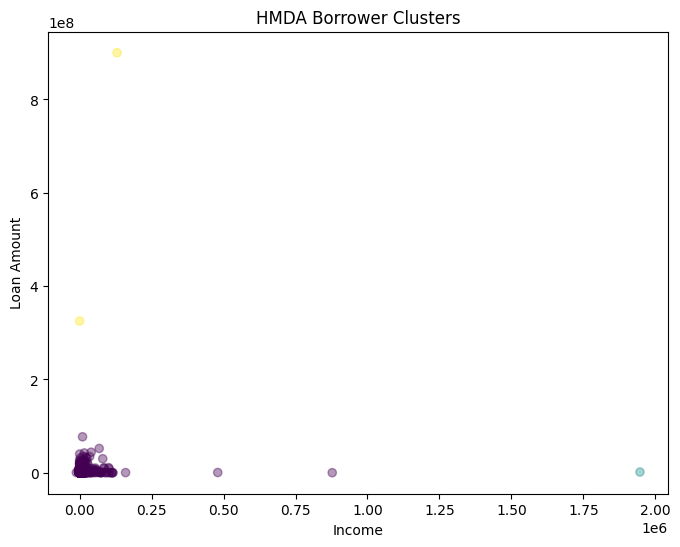

In [ ]:
#we build a figure to visualize these clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(hmda_clust["income"], hmda_clust["loan_amount"],
            c=hmda_clust["cluster"], cmap="viridis", alpha=0.4)
plt.xlabel("Income")
plt.ylabel("Loan Amount")
plt.title("HMDA Borrower Clusters")
plt.show()

For the three clusters:

Cluster 0: income is around 190k and the loans are around $358,000. this is the largest and most typical mortgage cluster. Most likely this cluster is the middle-income households taking out moderately sized mortgages. (bottom left)

Cluster 1: income is around 1.9 million and the laons are around 1.05 million. This group is most likely high-net-worth borrowers taking out very high loans. K-means isolates them very strongly. (bottom right)


Cluster 2: income is around 65k  and the loan amount is around 612k. This k-mean cluster shows a nonlinear relationship since it is low-income borrowers taking out high loan amounts. (bottom right)



In [ ]:
#get a clean copy of prosper data
df_5 = prosper.copy()

#create a midpoint credit score
df_5["CreditScoreMid"] = (df_5["CreditScoreRangeLower"] + df_5["CreditScoreRangeUpper"]) / 2

#we only keep the rows with valid APR and credit score
df_5 = df_5[["CreditScoreMid", "BorrowerAPR"]].dropna()

#we want to remove clusters where credit score =0 to create a cleaner model
df_5 = df_5[df_5["CreditScoreMid"] > 0]

df_5.head()

,CreditScoreMid,BorrowerAPR
0,649.5,0.16516
1,689.5,0.12016
2,489.5,0.28269
3,809.5,0.12528
4,689.5,0.24614


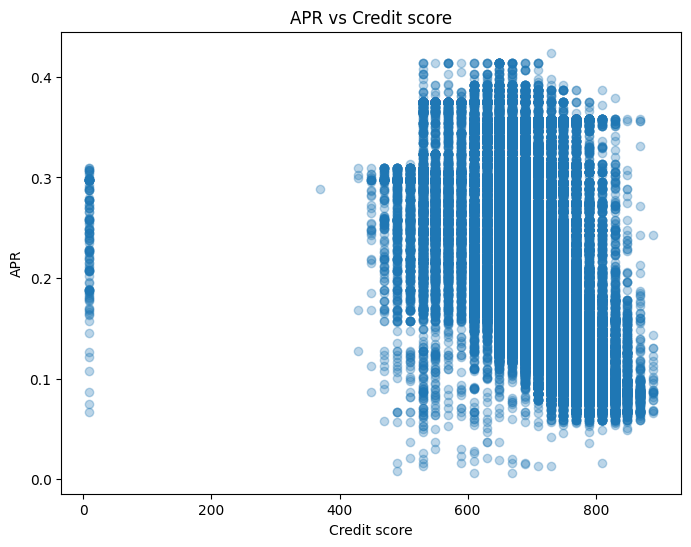

In [ ]:
#before we do any fitting or polynomeial regression, we visualize relationship
plt.figure(figsize=(8,6))
plt.scatter(df_5["CreditScoreMid"], df_5["BorrowerAPR"], alpha=0.3)
plt.xlabel("Credit score")
plt.ylabel("APR")
plt.title("APR vs Credit score")
plt.show()

We notice here that APR and Credit score are not linear. Therefore polynomial regression is appropriate here.

In [ ]:
#define features
X_linear = df_5[["CreditScoreMid"]]
y = df_5["BorrowerAPR"]

#polynomial features
df_5["CreditScoreMid_sq"] = df_5["CreditScoreMid"] ** 2
X_poly = df_5[["CreditScoreMid", "CreditScoreMid_sq"]]

In [ ]:
#train test split
X_linear_train, X_linear_test, y_train, y_test = train_test_split(X_linear, y, test_size=0.2, random_state=42)
X_poly_train, X_poly_test, _, _ = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [ ]:
#we fit the models
linear = LinearRegression()
linear.fit(X_linear_train, y_train)

poly = LinearRegression()
poly.fit(X_poly_train, y_train)

LinearRegression()

In [ ]:
#our predictions based on fitted models
y_pred_linear = linear.predict(X_linear_test)
y_pred_poly = poly.predict(X_poly_test)

In [ ]:
#metrics for linear and poly RMSE and R2 score
rmse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_poly = mean_squared_error(y_test, y_pred_poly)
r2_linear = r2_score(y_test, y_pred_linear)
r2_poly = r2_score(y_test, y_pred_poly)

In [ ]:
#RMSE for linear
print(rmse_linear)

0.005253541558861347


In [ ]:
#Poly RMSE
print(rmse_poly)

0.004977607643595537


In [ ]:
#r2 score for linear
print(r2_linear)

0.18938482746559027


In [ ]:
#r2 score for poly
print(r2_poly)

0.23196110021896887


We see here polynomial r2 score outperforms its linear counterpart.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


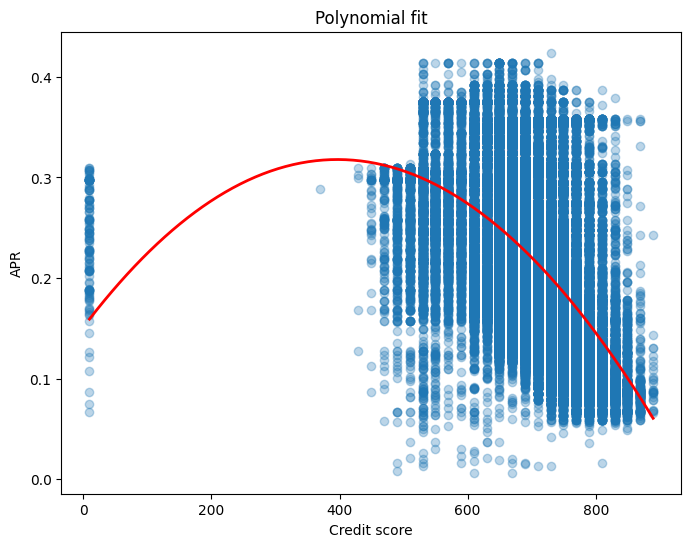

In [ ]:
#visualize the fitted curve
score_grid = np.linspace(df_5["CreditScoreMid"].min(), df_5["CreditScoreMid"].max(), 300)
poly_pred_curve = poly.predict(np.column_stack([score_grid, score_grid**2]))

plt.figure(figsize=(8,6))
plt.scatter(df_5["CreditScoreMid"], df_5["BorrowerAPR"], alpha=0.3)
plt.plot(score_grid, poly_pred_curve, color="red", linewidth=2)
plt.xlabel("Credit score")
plt.ylabel("APR")
plt.title("Polynomial fit")
plt.show()

This polynomial fit graph is attempting to draw a curve where there is no data for credit scores in the near the 200s.
Main point: APR does not rise for those with higher credit scores.

This curve showing an increase at credit scores of 400 is not completely accurate, as those with a credit score of 400 do not necessarily have the highest APR.